# SVM classifier to predict the no of adults in US having salary of 50k 

<b> lets import the initial libraries needed

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<b> lets read the dataset

In [6]:
salary = pd.read_csv("salary.csv")

In [7]:
salary.head()

,Unnamed: 0,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
salary.drop("Unnamed: 0" , axis = 1 ,inplace = True)

In [12]:
salary.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [31]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
salary.dropna(subset = ['Occupation'] ,inplace =True)

In [34]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30718 non-null  int64 
 1   Workclass       30718 non-null  object
 2   fnlwgt          30718 non-null  int64 
 3   Education       30718 non-null  object
 4   Education-Num   30718 non-null  int64 
 5   Marital Status  30718 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    30718 non-null  object
 8   Race            30718 non-null  object
 9   Gender          30718 non-null  object
 10  Capital Gain    30718 non-null  int64 
 11  Capital Loss    30718 non-null  int64 
 12  Hours per week  30718 non-null  int64 
 13  Country         30162 non-null  object
 14  Target          30718 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [35]:
salary.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,30718.000000,3.071800e+04,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,1.898455e+05,10.130314,1106.037079,88.910216,40.949313
std,13.118227,1.054583e+05,2.562469,7497.863364,405.657203,11.985382
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
salary['fnlwgt'].nunique()

20495

In [37]:
salary.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
salary['Race'].value_counts()

White                 26301
Black                  2909
Asian-Pac-Islander      974
Amer-Indian-Eskimo      286
Other                   248
Name: Race, dtype: int64

In [38]:
salary.groupby(['Race','Target']).size()

Race                Target
Amer-Indian-Eskimo  <=50K       252
                    >50K         34
Asian-Pac-Islander  <=50K       703
                    >50K        271
Black               <=50K      2531
                    >50K        378
Other               <=50K       225
                    >50K         23
White               <=50K     19357
                    >50K       6944
dtype: int64

In [41]:
salary['Gender'].value_counts()

Male      20788
Female     9930
Name: Gender, dtype: int64

In [39]:
salary.groupby(['Gender','Target']).size()

Gender  Target
Female  <=50K      8803
        >50K       1127
Male    <=50K     14265
        >50K       6523
dtype: int64

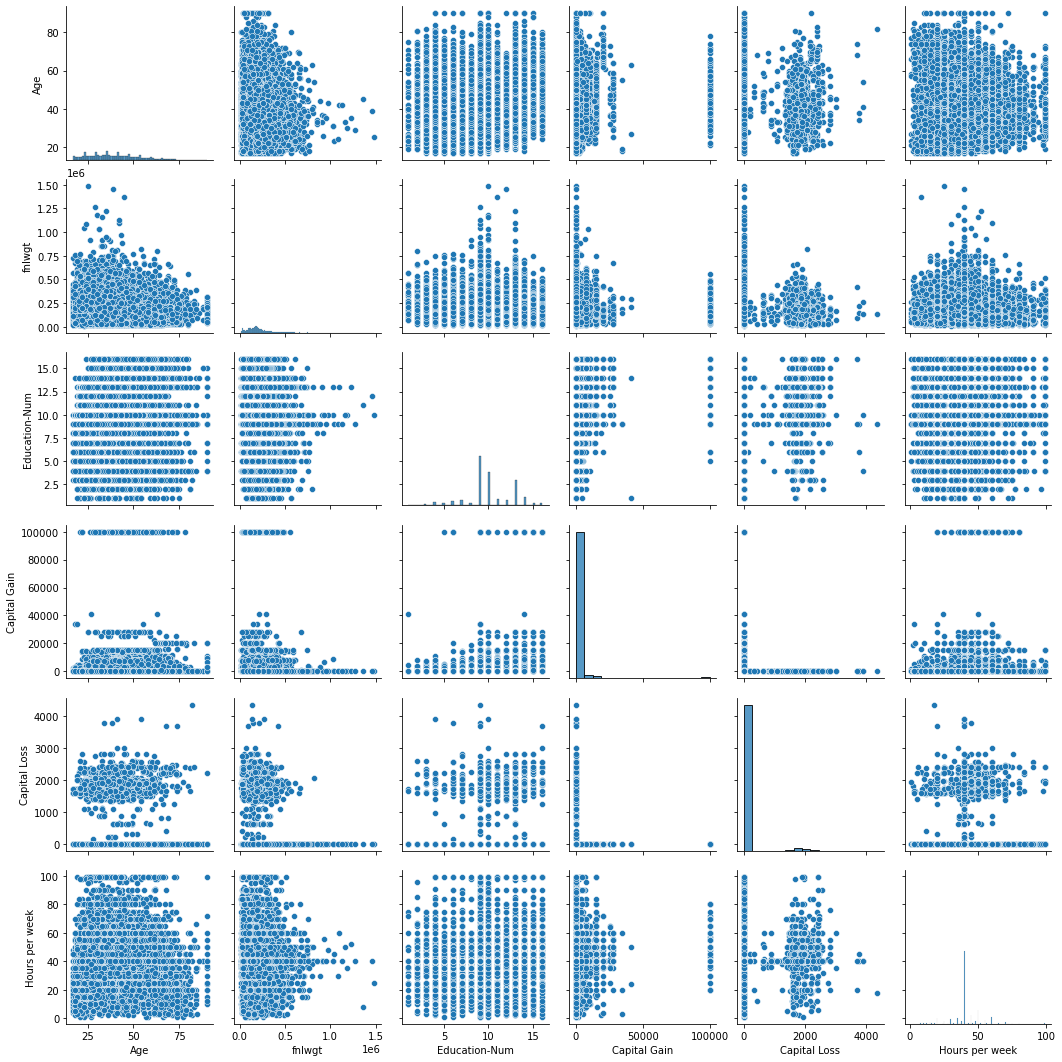

In [42]:
sns.pairplot(salary)

In [44]:
import math

In [49]:
salary.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [52]:
salary.dtypes


Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Marital Status    object
Occupation        object
Relationship      object
Race              object
Gender            object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Target            object
dtype: object

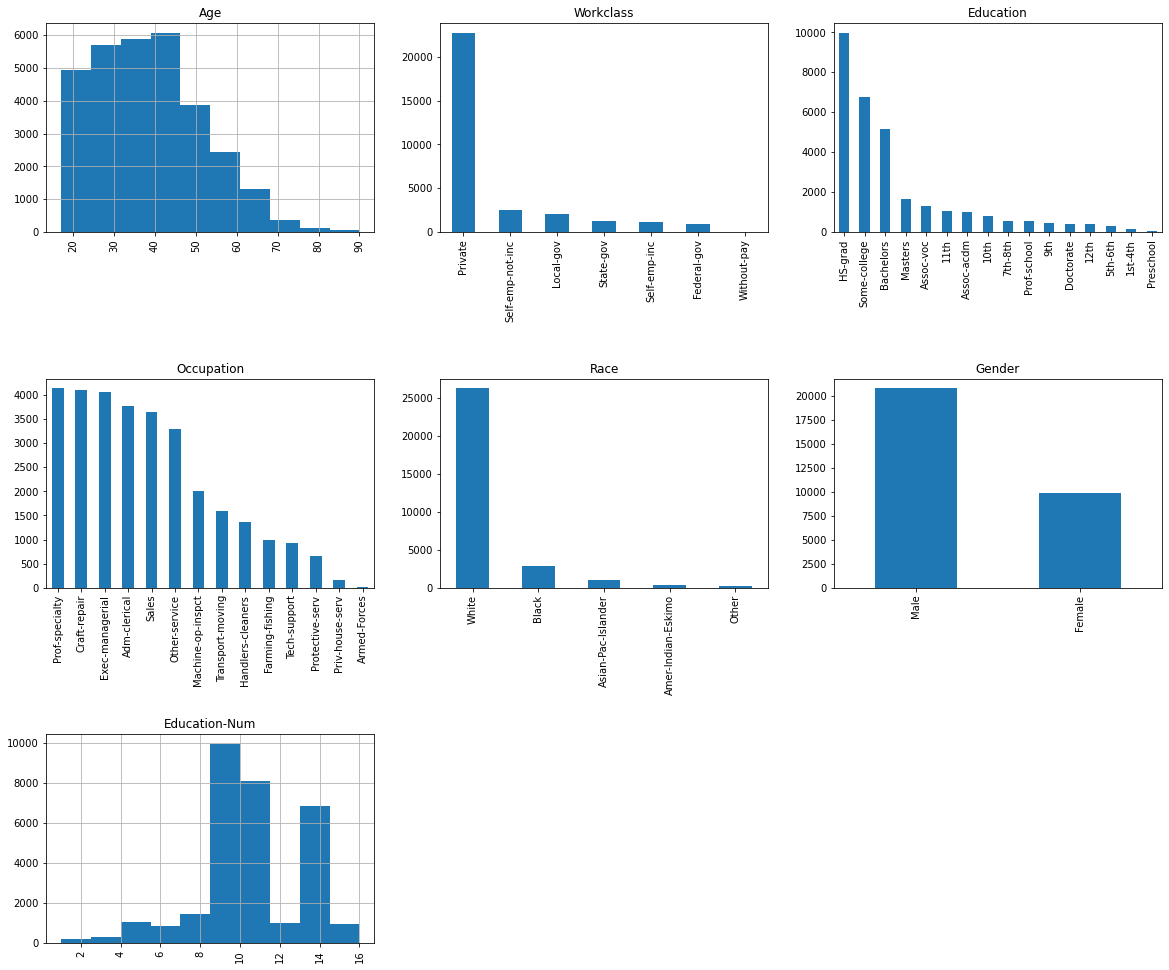

In [55]:
fig = plt.figure(figsize = (20,30))
cols = 3
rows =  math.ceil(float(salary.shape[1])/cols)

for i , column in enumerate(['Age' ,'Workclass' ,'Education' ,'Occupation','Race' ,'Gender' ,'Education-Num' ]):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if salary.dtypes[column] == np.object :
        salary[column].value_counts().plot(kind = "bar" ,axes =ax)
    else :
        salary[column].hist(axes = ax)
        plt.xticks(rotation ="vertical")
        
plt.subplots_adjust(hspace = 0.7  ,wspace = 0.2)
plt.show()

In [56]:
salary.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
salary['Target'].unique()

array(['<=50K', '>50K'], dtype=object)

In [62]:
import sklearn.preprocessing as preprocessing

In [63]:
le = preprocessing.LabelEncoder()

In [64]:
salary['Occupation'] = le.fit_transform(salary['Occupation'].astype(str))

In [66]:
salary['Gender'] = le.fit_transform(salary['Gender'].astype(str))
salary['Target'] = le.fit_transform(salary['Target'].astype(str))

In [68]:
salary.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,0,0,0,40,Cuba,0


In [69]:
salary['Target'].unique()

array([0, 1])

<AxesSubplot:xlabel='Education-Num'>

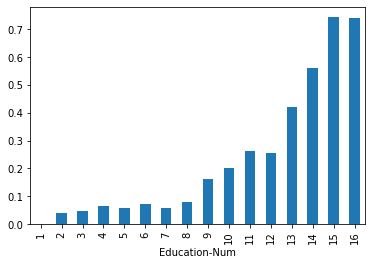

In [71]:
salary.groupby('Education-Num').Target.mean().plot(kind='bar')

<AxesSubplot:>

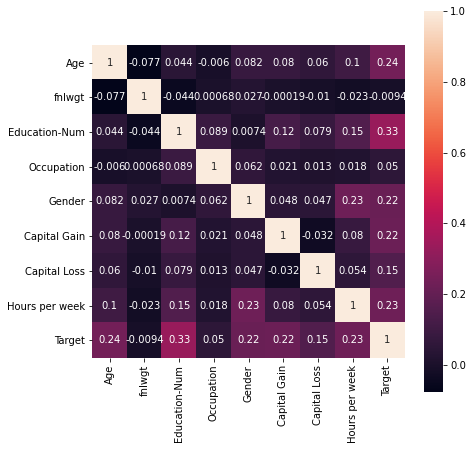

In [74]:
f , ax = plt.subplots(figsize = (7,7))
sns.heatmap(salary.corr(),annot =True ,square = True)

In [ ]:
['Age' ,'Education-Num','Occupation','Gender']

# Train test split 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = salary[['Age' ,'Education-Num','Occupation','Gender']]
y= salary['Target']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [78]:
X_train

,Age,Education-Num,Occupation,Gender
31379,67,6,2,1
31017,48,9,5,1
1640,52,9,7,0
3075,18,10,11,0
5499,56,9,2,1
...,...,...,...,...
31575,18,9,0,0
5762,42,10,12,1
918,81,9,3,1
16738,19,10,6,0


In [79]:
X_test

,Age,Education-Num,Occupation,Gender
16521,44,14,0,1
22693,48,9,11,1
14615,67,13,0,0
10134,26,9,0,0
4454,21,9,11,1
...,...,...,...,...
20142,31,13,9,0
7030,24,13,11,1
9791,55,9,13,1
16667,45,15,9,1


# Training 

In [81]:
from sklearn.svm import SVC

In [82]:
classifier = SVC()

In [83]:
classifier.fit(X_test,y_test)

SVC()

# Prediction

In [85]:
classifier.score(X_test,y_test)

0.7885199652777778

In [86]:
predictions = classifier.predict(X_test)

In [88]:
len((predictions))

9216

# evaluation

In [89]:
from sklearn.metrics import classification_report ,confusion_matrix

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      6917
           1       0.66      0.31      0.42      2299

    accuracy                           0.79      9216
   macro avg       0.73      0.63      0.65      9216
weighted avg       0.77      0.79      0.76      9216



In [92]:
confusion_matrix(y_test,predictions)

array([[6555,  362],
       [1587,  712]], dtype=int64)

<b>looks like our model works poorly for '1' (>50k) as this is a imbalanced dataset i.e it has more data for 0(<50k) compared to 1 (>50k).

In [94]:
y.value_counts()

0    23068
1     7650
Name: Target, dtype: int64